### Observations

* In the northern hemisphere, there is a strong correlation between latitude and max temperature. The highest temperaturess occur between 
0 and 20 degrees north. There is a clear inverse relationship between temperature and latitude: temperatures steadily decrease 
with increasing latitude.

* In the southern hemisphere, there is a positive correlation between latitude and temperature: as latitude increases, temperatures also
increase. The correlation is not as strong as it is in the north, but the trend is evident. Temperatures are greatest from 0 to -15 degrees.

* There is no correlation between humidity and latitude, cloudiness and latitude, or wind speed and latitude, either in the northern or
southern hemispheres.

In [6]:
%load_ext lab_black

In [7]:
import requests, json, random
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from config import weather_api_key
from citipy import citipy
from scipy import stats
from datetime import date

In [3]:
# Build list of random coordinates

coordinate_list = []
counter = 0
number_of_points = 1500

while counter < number_of_points:
    lat = round(random.uniform(-90, 90), 6)
    lon = round(random.uniform(-180, 180), 6)
    counter += 1
    coordinate_list.append((lat, lon))

# Assign nearest city to given set of coordinates (no duplicates)
cities = []
city_count = 0

for coords in coordinate_list:
    city = citipy.nearest_city(coords[0], coords[1])
    if city.city_name not in cities:
        cities.append(city.city_name)
        city_count += 1

In [5]:
city_count

607

In [6]:
# Retrieve weather data from the OpenWeather API for each city

cities_results = []
count = 0
found_count = 0
not_found_count = 0

print("Beginning data retrieval:\n")
print(50 * "-")

for citi in cities:
    
    endpoint = "http://api.openweathermap.org/data/2.5/weather"
    payload = {"q": citi, "appid": weather_api_key, "units": "imperial"}

    r = requests.get(url=endpoint, params=payload)

    count += 1

    if r.status_code == 200:
        data = r.json()
        cities_results.append(data)
        print("Processing record: ", count, " | ", citi)
        found_count += 1
    else:
        print("Processing record: ", count, " | ", citi, " *Not Found*")
        not_found_count += 1
        

Beginning data retrieval:

--------------------------------------------------
Processing record:  1  |  severo-kurilsk
Processing record:  2  |  airai
Processing record:  3  |  esperance
Processing record:  4  |  ushuaia
Processing record:  5  |  chokurdakh
Processing record:  6  |  ponta do sol
Processing record:  7  |  butaritari
Processing record:  8  |  zhigansk
Processing record:  9  |  salalah
Processing record:  10  |  buin
Processing record:  11  |  ilulissat
Processing record:  12  |  rikitea
Processing record:  13  |  bibiani
Processing record:  14  |  bengkulu
Processing record:  15  |  lebu
Processing record:  16  |  atuona
Processing record:  17  |  puerto ayora
Processing record:  18  |  bedford
Processing record:  19  |  ixtapa
Processing record:  20  |  kapaa
Processing record:  21  |  saint-philippe
Processing record:  22  |  grand river south east  *Not Found*
Processing record:  23  |  mataura
Processing record:  24  |  touros
Processing record:  25  |  beloha
Proces

In [7]:
r.status_code

200

In [8]:
found_count

562

In [9]:
not_found_count

45

In [3]:
cities_results[0]

NameError: name 'cities_results' is not defined

In [2]:
city_data = []

for city in cities_results:
    city_data.append(
        {
            "City": city["name"],
            "Country": city["sys"]["country"],
            "Lat": city["coord"]["lat"],
            "Long": city["coord"]["lon"],
            "Temp_max": city["main"]["temp_max"],
            "Humidity": city["main"]["humidity"],
            "Cloudiness": city["clouds"]["all"],
            "Wind_Speed": city["wind"]["speed"],
        }
    )

city_table = pd.DataFrame(city_data)
city_table.to_csv("data/city_weather_data.csv", index=False)

NameError: name 'cities_results' is not defined

In [12]:
city_table

,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed
0,Severo-Kuril'sk,RU,50.68,156.12,49.98,66,4,13.27
1,Airai,TL,-8.93,125.41,80.11,43,0,6.64
2,Esperance,AU,-33.87,121.90,60.80,67,75,10.29
3,Ushuaia,AR,-54.80,-68.30,41.00,86,75,20.80
4,Chokurdakh,RU,70.63,147.92,44.82,68,99,6.62
...,...,...,...,...,...,...,...,...
557,Henties Bay,NA,-22.12,14.28,55.00,95,2,2.44
558,Narva-Jõesuu,EE,59.46,28.04,56.16,93,67,9.46
559,Cayenne,GF,4.93,-52.33,77.00,100,20,8.08
560,Sundargarh,IN,22.12,84.03,86.00,70,75,9.17


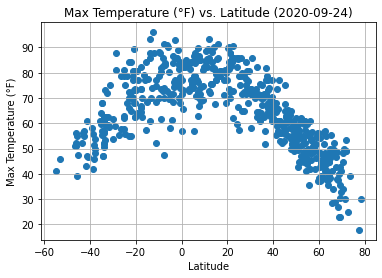

In [27]:
# Scatter plot of Temperature vs. Latitude
today = date.today()

x_values = city_table["Lat"]
y_values = city_table["Temp_max"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Max Temperature (°F) vs. Latitude ({today})")
plt.savefig("plots/Max Temp vs Lat.png")
plt.show()

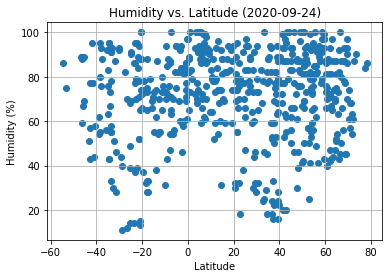

In [28]:
# Scatter plot of Humidity vs. Latitude
x_values = city_table["Lat"]
y_values = city_table["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Humidity vs. Latitude ({today})")
plt.savefig("plots/Humidity vs Lat.png")
plt.show()

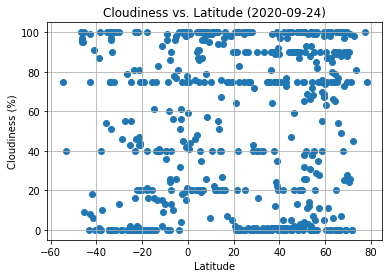

In [29]:
# Scatter plot of Cloudiness vs. Latitude
x_values = city_table["Lat"]
y_values = city_table["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Cloudiness vs. Latitude ({today})")
plt.savefig("plots/Cloudiness vs Lat.png")
plt.show()

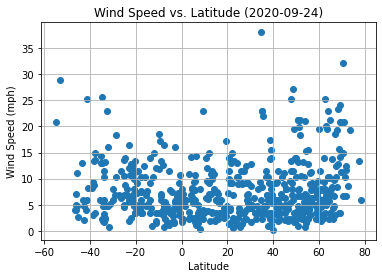

In [30]:
# Scatter plot of Wind Speed vs. Latitude
x_values = city_table["Lat"]
y_values = city_table["Wind_Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Wind Speed vs. Latitude ({today})")
plt.savefig("plots/Wind Speed vs Lat.png")
plt.show()

y = -0.65x + 88.04
The r-value is: 0.734728100488337


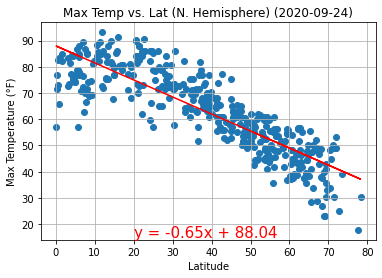

In [32]:
# Perform a linear regression on temperature vs. latitude for Northern Hemisphere
north_Lat_values = city_table.loc[city_table["Lat"] >= 0]["Lat"]
north_Temp_values = city_table.loc[city_table["Lat"] >= 0]["Temp_max"]

(
    N_temp_slope,
    N_temp_intercept,
    N_temp_rvalue,
    N_temp_pvalue,
    N_temp_stderr,
) = stats.linregress(north_Lat_values, north_Temp_values)

# Get regression values - N. Hemisphere
N_temp_regress_values = north_Lat_values * N_temp_slope + N_temp_intercept

# Create line equation string - N. Hemisphere
N_temp_line_eq = (
    "y = " + str(round(N_temp_slope, 2)) + "x + " + str(round(N_temp_intercept, 2))
)
print(N_temp_line_eq)

plt.scatter(north_Lat_values, north_Temp_values)
plt.plot(north_Lat_values, N_temp_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.annotate(N_temp_line_eq, (20, 15), fontsize=15, color="red")
plt.title(f"Max Temp vs. Lat (N. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {N_temp_rvalue**2}")

plt.savefig("plots/Max_Temp_vs_Lat_North_LinReg.png")

plt.show()

y = 0.68x + 82.87
The r-value is: 0.5103194767711854


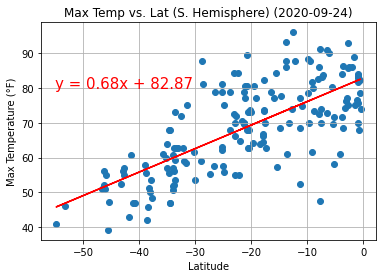

In [33]:
# Perform a linear regression on temperature vs. latitude for Southern Hemisphere
south_Lat_values = city_table.loc[city_table["Lat"] < 0]["Lat"]
south_Temp_values = city_table.loc[city_table["Lat"] < 0]["Temp_max"]

(
    S_temp_slope,
    S_temp_intercept,
    S_temp_rvalue,
    S_temp_pvalue,
    S_temp_stderr,
) = stats.linregress(south_Lat_values, south_Temp_values)

# Get regression values - S. Hemisphere
S_temp_regress_values = south_Lat_values * S_temp_slope + S_temp_intercept

# Create line equation string - S. Hemisphere
S_temp_line_eq = (
    "y = " + str(round(S_temp_slope, 2)) + "x + " + str(round(S_temp_intercept, 2))
)
print(S_temp_line_eq)

plt.scatter(south_Lat_values, south_Temp_values)
plt.plot(south_Lat_values, S_temp_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.annotate(S_temp_line_eq, (-55, 80), fontsize=15, color="red")
plt.title(f"Max Temp vs. Lat (S. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {S_temp_rvalue**2}")

plt.savefig("plots/Max_Temp_vs_Lat_South_LinReg.png")

plt.show()

y = -0.07x + 76.29
The r-value is: 0.00562563266520413


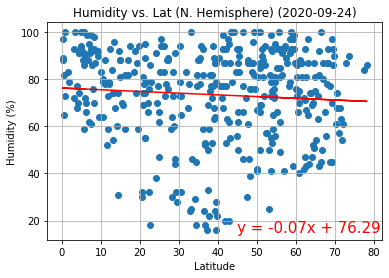

In [34]:
# Perform a linear regression on humidity vs. latitude for Northern Hemisphere
north_Hum_values = city_table.loc[city_table["Lat"] >= 0]["Humidity"]

(
    N_hum_slope,
    N_hum_intercept,
    N_hum_rvalue,
    N_hum_pvalue,
    N_hum_stderr,
) = stats.linregress(north_Lat_values, north_Hum_values)

# Get regression values - N. Hemisphere
N_hum_regress_values = north_Lat_values * N_hum_slope + N_hum_intercept

# Create line equation string - N. Hemisphere
N_hum_line_eq = (
    "y = " + str(round(N_hum_slope, 2)) + "x + " + str(round(N_hum_intercept, 2))
)
print(N_hum_line_eq)

plt.scatter(north_Lat_values, north_Hum_values)
plt.plot(north_Lat_values, N_hum_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(N_hum_line_eq, (45, 15), fontsize=15, color="red")
plt.title(f"Humidity vs. Lat (N. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {N_hum_rvalue**2}")

plt.savefig("plots/Humidity_vs_Lat_North_LinReg.png")

plt.show()

y = 0.08x + 70.47
The r-value is: 0.0027558971715222536


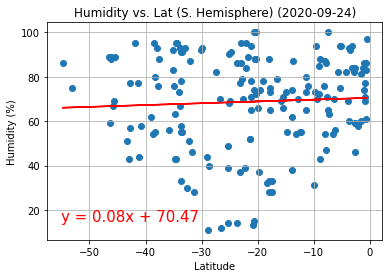

In [35]:
# Perform a linear regression on humidity vs. latitude for Southern Hemisphere
south_Hum_values = city_table.loc[city_table["Lat"] < 0]["Humidity"]

(
    S_hum_slope,
    S_hum_intercept,
    S_hum_rvalue,
    S_hum_pvalue,
    S_hum_stderr,
) = stats.linregress(south_Lat_values, south_Hum_values)

# Get regression values - S. Hemisphere
S_hum_regress_values = south_Lat_values * S_hum_slope + S_hum_intercept

# Create line equation string - S. Hemisphere
S_hum_line_eq = (
    "y = " + str(round(S_hum_slope, 2)) + "x + " + str(round(S_hum_intercept, 2))
)
print(S_hum_line_eq)

plt.scatter(south_Lat_values, south_Hum_values)
plt.plot(south_Lat_values, S_hum_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(S_hum_line_eq, (-55, 15), fontsize=15, color="red")
plt.title(f"Humidity vs. Lat (S. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {S_hum_rvalue**2}")

plt.savefig("plots/Humidity_vs_Lat_South_LinReg.png")

plt.show()

In [36]:
city_table.head()

,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed
0,Severo-Kuril'sk,RU,50.68,156.12,49.98,66,4,13.27
1,Airai,TL,-8.93,125.41,80.11,43,0,6.64
2,Esperance,AU,-33.87,121.90,60.80,67,75,10.29
3,Ushuaia,AR,-54.80,-68.30,41.00,86,75,20.80
4,Chokurdakh,RU,70.63,147.92,44.82,68,99,6.62


y = -0.1x + 57.18
The r-value is: 0.0025854367928560863


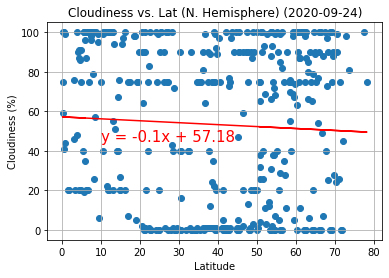

In [37]:
# Perform a linear regression on cloudiness vs. latitude for Northern Hemisphere
north_Cloud_values = city_table.loc[city_table["Lat"] >= 0]["Cloudiness"]

(
    N_cloud_slope,
    N_cloud_intercept,
    N_cloud_rvalue,
    N_cloud_pvalue,
    N_cloud_stderr,
) = stats.linregress(north_Lat_values, north_Cloud_values)

# Get regression values - N. Hemisphere
N_cloud_regress_values = north_Lat_values * N_cloud_slope + N_cloud_intercept

# Create line equation string - N. Hemisphere
N_cloud_line_eq = (
    "y = " + str(round(N_cloud_slope, 2)) + "x + " + str(round(N_cloud_intercept, 2))
)
print(N_cloud_line_eq)

plt.scatter(north_Lat_values, north_Cloud_values)
plt.plot(north_Lat_values, N_cloud_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(N_cloud_line_eq, (10, 45), fontsize=15, color="red")
plt.title(f"Cloudiness vs. Lat (N. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {N_cloud_rvalue**2}")

plt.savefig("plots/Cloudiness_vs_Lat_North_LinReg.png")

plt.show()

y = 0.03x + 47.38
The r-value is: 0.00013794760548923506


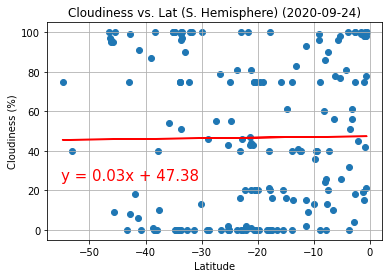

In [38]:
# Perform a linear regression on cloudiness vs. latitude for Southern Hemisphere
south_Cloud_values = city_table.loc[city_table["Lat"] < 0]["Cloudiness"]

(
    S_cloud_slope,
    S_cloud_intercept,
    S_cloud_rvalue,
    S_cloud_pvalue,
    S_cloud_stderr,
) = stats.linregress(south_Lat_values, south_Cloud_values)

# Get regression values - S. Hemisphere
S_cloud_regress_values = south_Lat_values * S_cloud_slope + S_cloud_intercept

# Create line equation string - S. Hemisphere
S_cloud_line_eq = (
    "y = " + str(round(S_cloud_slope, 2)) + "x + " + str(round(S_cloud_intercept, 2))
)
print(S_cloud_line_eq)

plt.scatter(south_Lat_values, south_Cloud_values)
plt.plot(south_Lat_values, S_cloud_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(S_cloud_line_eq, (-55, 25), fontsize=15, color="red")
plt.title(f"Cloudiness vs. Lat (S. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {S_cloud_rvalue**2}")

plt.savefig("plots/Cloudiness_vs_Lat_South_LinReg.png")

plt.show()

y = 0.07x + 4.93
The r-value is: 0.06166485067146618


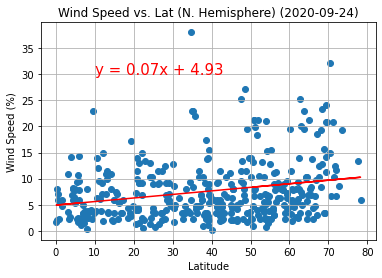

In [39]:
# Perform a linear regression on wind speed vs. latitude for Northern Hemisphere
north_Wind_values = city_table.loc[city_table["Lat"] >= 0]["Wind_Speed"]

(
    N_wind_slope,
    N_wind_intercept,
    N_wind_rvalue,
    N_wind_pvalue,
    N_wind_stderr,
) = stats.linregress(north_Lat_values, north_Wind_values)

# Get regression values - N. Hemisphere
N_wind_regress_values = north_Lat_values * N_wind_slope + N_wind_intercept

# Create line equation string - N. Hemisphere
N_wind_line_eq = (
    "y = " + str(round(N_wind_slope, 2)) + "x + " + str(round(N_wind_intercept, 2))
)
print(N_wind_line_eq)

plt.scatter(north_Lat_values, north_Wind_values)
plt.plot(north_Lat_values, N_wind_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.annotate(N_wind_line_eq, (10, 30), fontsize=15, color="red")
plt.title(f"Wind Speed vs. Lat (N. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {N_wind_rvalue**2}")

plt.savefig("plots/WindSpeed_vs_Lat_North_LinReg.png")

plt.show()

y = -0.09x + 5.71
The r-value is: 0.058677148740925084


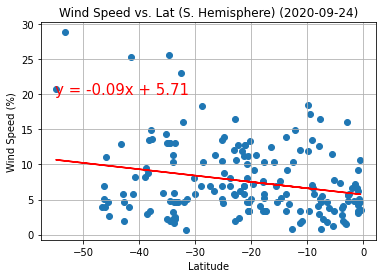

In [40]:
# Perform a linear regression on wind speed vs. latitude for Southern Hemisphere
south_Wind_values = city_table.loc[city_table["Lat"] < 0]["Wind_Speed"]

(
    S_wind_slope,
    S_wind_intercept,
    S_wind_rvalue,
    S_wind_pvalue,
    S_wind_stderr,
) = stats.linregress(south_Lat_values, south_Wind_values)

# Get regression values - S. Hemisphere
S_wind_regress_values = south_Lat_values * S_wind_slope + S_wind_intercept

# Create line equation string - S. Hemisphere
S_wind_line_eq = (
    "y = " + str(round(S_wind_slope, 2)) + "x + " + str(round(S_wind_intercept, 2))
)
print(S_wind_line_eq)

plt.scatter(south_Lat_values, south_Wind_values)
plt.plot(south_Lat_values, S_wind_regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.annotate(S_wind_line_eq, (-55, 20), fontsize=15, color="red")
plt.title(f"Wind Speed vs. Lat (S. Hemisphere) ({today})")
plt.grid(axis="x")
plt.grid(axis="y")

print(f"The r-value is: {S_wind_rvalue**2}")

plt.savefig("plots/WindSpeed_vs_Lat_South_LinReg.png")

plt.show()